## Import Packages

In [263]:
# EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprcessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Modeling
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error

# Plot Settings
sns.set(rc= {'figure.figsize': [15, 7]}, font_scale= 1.2)
sns.set_style('whitegrid')

import warnings
warnings.filterwarnings('ignore')

## Data Cleaning

### Import data

In [264]:
df = pd.read_csv('./exams.csv')

In [265]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [266]:
df.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,66.396000,69.002000,67.738000
std,15.402871,14.737272,15.600985
min,13.000000,27.000000,23.000000
25%,56.000000,60.000000,58.000000
50%,66.500000,70.000000,68.000000
75%,77.000000,79.000000,79.000000
max,100.000000,100.000000,100.000000


In [267]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [268]:
df.sample(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
406,male,group D,some college,standard,none,94,92,85
158,female,group D,associate's degree,free/reduced,none,82,95,93
930,female,group D,some high school,standard,completed,71,83,89
460,male,group B,some college,free/reduced,completed,56,67,56
265,male,group D,some high school,standard,none,73,71,64


In [269]:
df['avg score'] = (df['math score'] + df['reading score'] + df['writing score']) // 3

In [270]:
df.sample(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,avg score
232,male,group C,some college,free/reduced,none,35,44,33,37
963,female,group D,some high school,standard,completed,63,61,71,65
664,female,group B,some high school,standard,none,71,77,79,75
418,male,group A,some college,standard,none,72,65,59,65
724,male,group D,high school,free/reduced,completed,60,62,57,59


In [271]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
 8   avg score                    1000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 70.4+ KB


In [272]:
df['gender'].value_counts()

male      517
female    483
Name: gender, dtype: int64

In [273]:
df['race/ethnicity'].value_counts()

group C    323
group D    262
group B    205
group E    131
group A     79
Name: race/ethnicity, dtype: int64

In [274]:
df['parental level of education'].value_counts()

some college          222
associate's degree    203
high school           202
some high school      191
bachelor's degree     112
master's degree        70
Name: parental level of education, dtype: int64

In [275]:
df['lunch'].value_counts()

standard        652
free/reduced    348
Name: lunch, dtype: int64

In [276]:
df['test preparation course'].value_counts()

none         665
completed    335
Name: test preparation course, dtype: int64

In [277]:
df.drop(['math score', 'reading score', 'writing score'], axis= 1, inplace= True)

df.sample(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,avg score
86,female,group C,some college,free/reduced,none,69
427,male,group C,associate's degree,standard,none,75
808,female,group C,master's degree,free/reduced,none,79
660,female,group C,high school,standard,completed,92
361,male,group C,some college,free/reduced,none,46


In [278]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
avg score                      0
dtype: int64

## Data Visualization

In [279]:
df.sample(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,avg score
169,female,group A,high school,standard,none,82
336,male,group D,some college,free/reduced,none,56
612,female,group A,bachelor's degree,standard,none,63
6,female,group A,bachelor's degree,standard,none,61
727,male,group E,high school,standard,none,69


Text(0.5, 1.0, 'Different ethnical groups count')

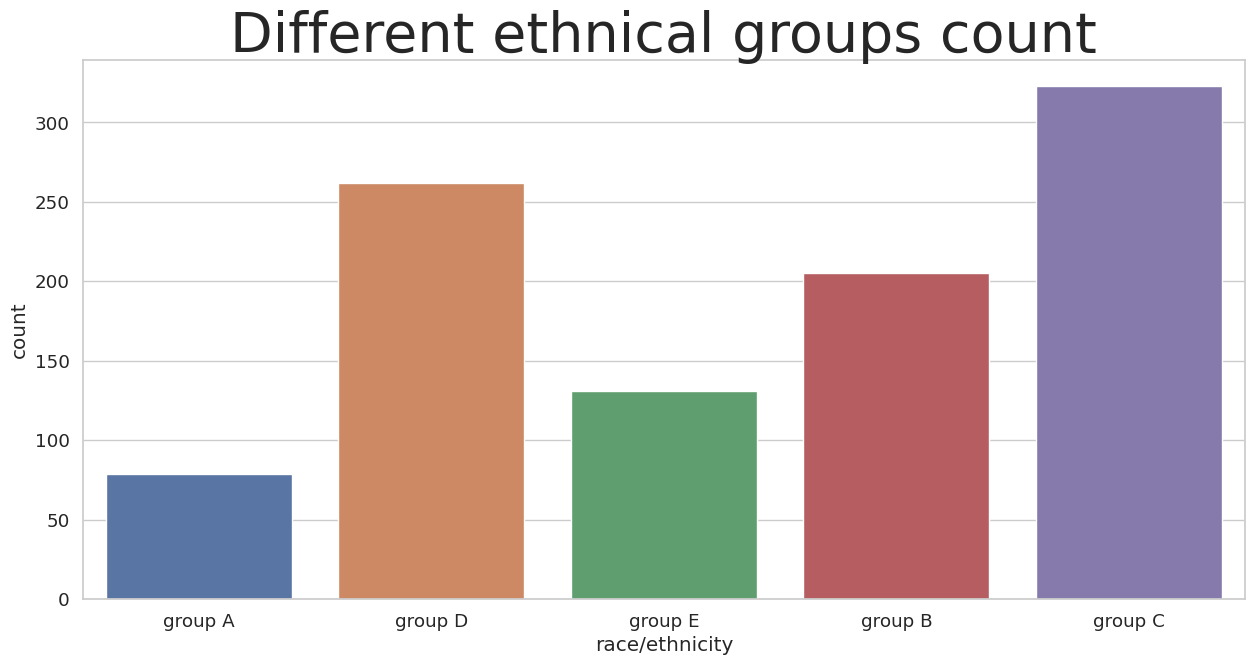

In [280]:
sns.countplot(df['race/ethnicity'])
plt.title('Different ethnical groups count', fontsize= 40)

Text(0.5, 1.0, 'How many students completed preparation course')

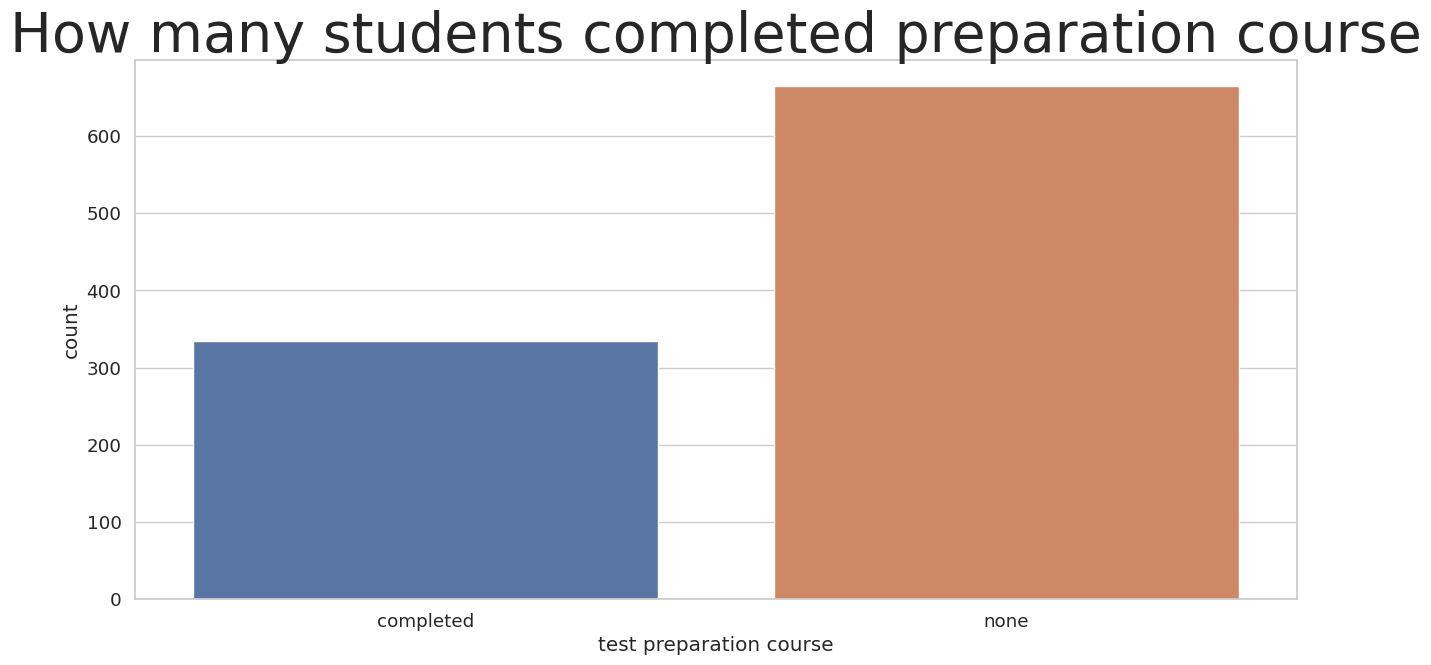

In [281]:
sns.countplot(df['test preparation course'])
plt.title('How many students completed preparation course', fontsize= 40)

Text(0.5, 1.0, 'How score is affected by preparation course')

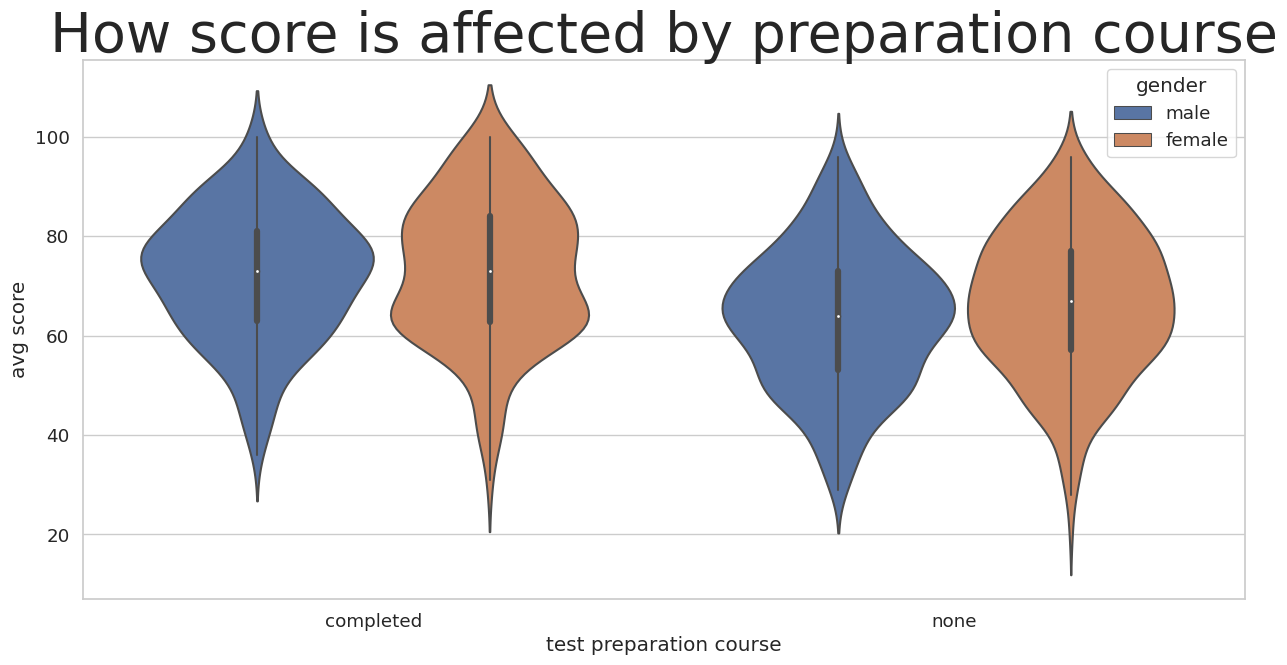

In [282]:
sns.violinplot(x= 'test preparation course', y= 'avg score', hue= 'gender', data= df)
plt.title('How score is affected by preparation course', fontsize= 40)

Text(0.5, 1.0, 'How ethnical group affect score')

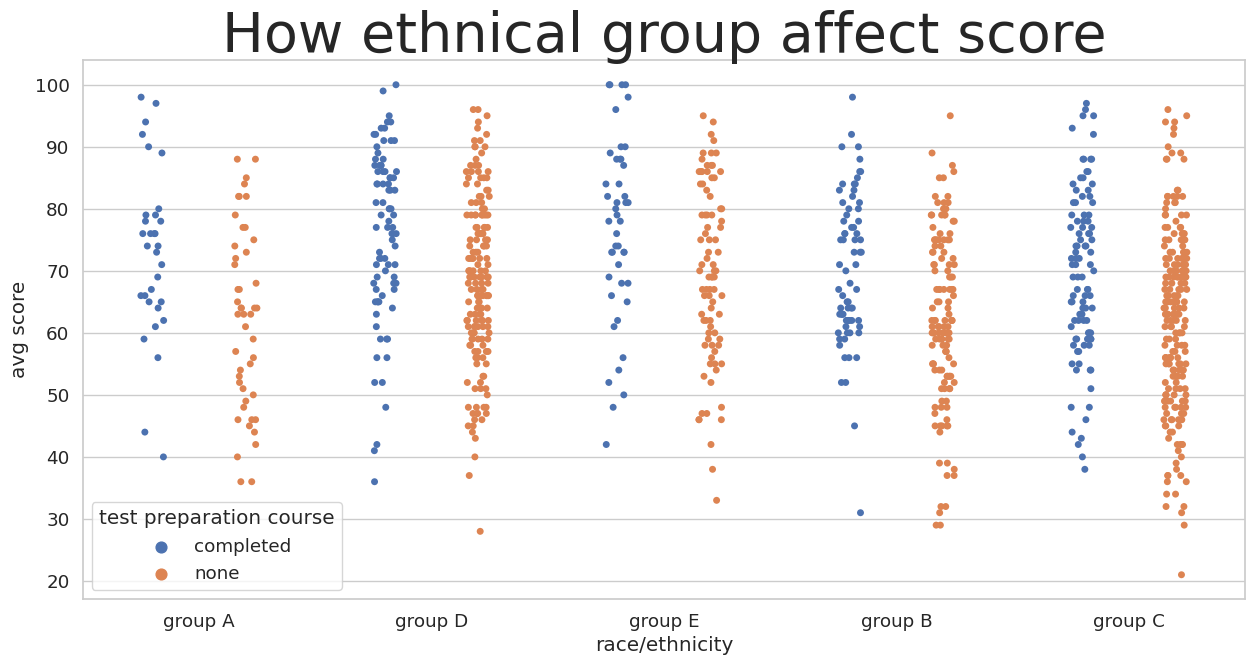

In [283]:
sns.stripplot(x= 'race/ethnicity', y= 'avg score', hue= 'test preparation course', dodge= True, data= df)
plt.title('How ethnical group affect score', fontsize= 40)

## Data Preprocessing

In [284]:
df.sample(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,avg score
208,female,group A,some college,standard,none,82
228,female,group D,high school,standard,none,79
916,male,group D,high school,standard,none,74
994,male,group E,high school,free/reduced,completed,81
242,male,group D,some high school,standard,none,62


### Gender

In [285]:
gender = {
    'male': 0,
    'female': 1
}

In [286]:
df['gender'] = df['gender'].map(gender)

### race/ethnicity

In [287]:
df['race/ethnicity'].value_counts()

group C    323
group D    262
group B    205
group E    131
group A     79
Name: race/ethnicity, dtype: int64

In [288]:
eth = {
    'group A': 0,
    'group E': 1,
    'group B': 2,
    'group D': 3,
    'group C': 4
}

In [289]:
df['race/ethnicity'] = df['race/ethnicity'].map(eth)

In [290]:
df['race/ethnicity'].value_counts()

4    323
3    262
2    205
1    131
0     79
Name: race/ethnicity, dtype: int64

### Test prepation course

In [291]:
tpc = {
    'none': 0,
    'completed': 1
}

In [292]:
df['test preparation course'] = df['test preparation course'].map(tpc)

### Parental level of education

In [293]:
df['parental level of education'].value_counts()

some college          222
associate's degree    203
high school           202
some high school      191
bachelor's degree     112
master's degree        70
Name: parental level of education, dtype: int64

In [294]:
ple = {
    'some high school': 0,
    'high school': 1,
    'associate\'s degree': 2,
    'some college': 3,
    'bachelor\'s degree': 4,
    'master\'s degree': 5
}

In [295]:
df['parental level of education'] = df['parental level of education'].map(ple)

### Lunch

In [296]:
df['lunch'].value_counts()

standard        652
free/reduced    348
Name: lunch, dtype: int64

In [297]:
lunch = {
    'free/reduced': 0,
    'standard': 1
}

In [298]:
df['lunch'] = df['lunch'].map(lunch)

In [299]:
df.sample(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,avg score
557,0,4,3,0,0,66
248,0,4,2,1,1,54
0,0,0,1,1,1,65
191,1,2,0,1,0,45
880,1,0,3,0,1,71


### Clasify Data

In [300]:
nums = df.select_dtypes(exclude= 'object').columns
nums

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'avg score'],
      dtype='object')

In [301]:
cats = df.select_dtypes(include= 'object').columns
cats

Index([], dtype='object')

### Handling nominal data

In [302]:
df = pd.get_dummies(df, columns= cats, drop_first= True)

### Splitting Data

In [303]:
# Define dataset
X, y = df.drop('avg score', axis= 1), df['avg score']

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 0)

In [304]:
X_train

,gender,race/ethnicity,parental level of education,lunch,test preparation course
105,1,3,4,1,0
68,0,2,1,1,0
479,0,4,2,0,0
399,1,0,3,0,1
434,0,4,2,1,0
...,...,...,...,...,...
835,1,2,0,1,0
192,0,1,0,0,0
629,0,4,1,1,0
559,0,1,1,0,0


### Handling numerical

In [305]:
nums = nums.drop('avg score')

In [306]:
scalar = StandardScaler()
scalar.fit(X_train[nums])

StandardScaler()

In [307]:
X_train[nums] = scalar.transform(X_train[nums])
X_test[nums] = scalar.transform(X_test[nums])